In [ ]:
### Soru 1 :
## Sınavlardaki performans cinsiyete, kökene ve anne-baba eğitim durumuna göre değişiklik göstermekte midir?

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
from scipy.stats.mstats import winsorize
from sqlalchemy import create_engine
import warnings

warnings.filterwarnings('ignore')
sns.set(style="whitegrid")
pd.options.display.float_format = '{:.3f}'.format
plt.rcParams['figure.dpi'] = 100
plt.rcParams['figure.figsize'] = (8,5.5)

ogrenciler=pd.read_csv("C:/Users/neslihan.kumbasar/bootcamp/StudentsPerformance.csv")
ogrenciler.columns=['cinsiyet','koken','aile_egt_seviyesi','ogle_yemegi','hazirlik_kursu','matematik_notu','okuma_notu','yazma_notu']

ogrenciler.head()

,cinsiyet,koken,aile_egt_seviyesi,ogle_yemegi,hazirlik_kursu,matematik_notu,okuma_notu,yazma_notu
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


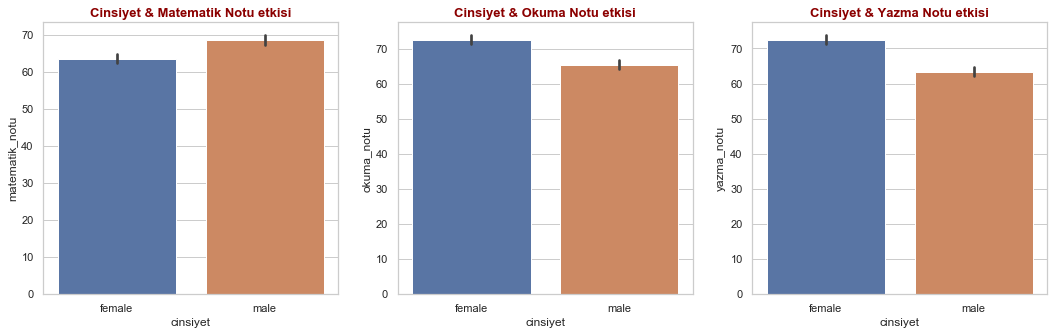

In [8]:
ogrenciler.groupby("cinsiyet").mean()
baslik_font = {'family': 'arial', 'color': 'darkred','weight': 'bold','size': 13 }
eksen_font  = {'family': 'arial', 'color': 'darkblue','weight': 'bold','size': 10 }

plt.figure(figsize=(18,5))
plt.subplot(1,3,1)
sns.barplot(ogrenciler["cinsiyet"], ogrenciler["matematik_notu"])
plt.title("Cinsiyet & Matematik Notu etkisi", fontdict=baslik_font)
plt.subplot(1,3,2)
sns.barplot(ogrenciler["cinsiyet"], ogrenciler["okuma_notu"])
plt.title("Cinsiyet & Okuma Notu etkisi", fontdict=baslik_font)
plt.subplot(1,3,3)
sns.barplot(ogrenciler["cinsiyet"], ogrenciler["yazma_notu"])
plt.title("Cinsiyet & Yazma Notu etkisi", fontdict=baslik_font)
plt.show()

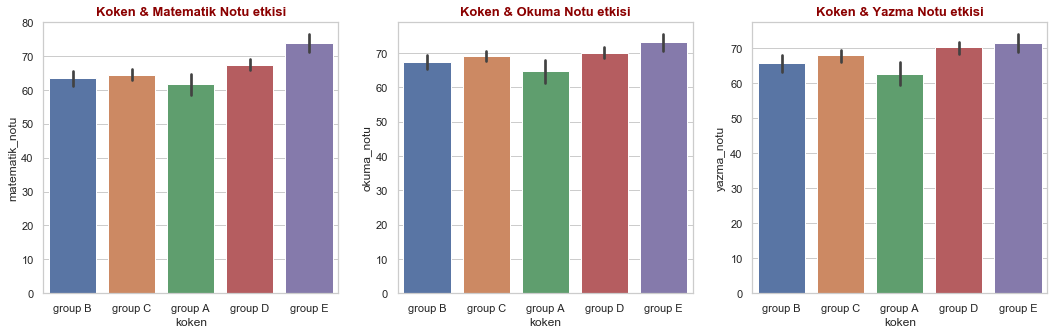

In [9]:
ogrenciler.groupby("koken").mean()
plt.figure(figsize=(18,5))
plt.subplot(1,3,1)
sns.barplot(ogrenciler["koken"], ogrenciler["matematik_notu"])
plt.title("Koken & Matematik Notu etkisi", fontdict=baslik_font)
plt.subplot(1,3,2)
sns.barplot(ogrenciler["koken"], ogrenciler["okuma_notu"])
plt.title("Koken & Okuma Notu etkisi", fontdict=baslik_font)
plt.subplot(1,3,3)
sns.barplot(ogrenciler["koken"], ogrenciler["yazma_notu"])
plt.title("Koken & Yazma Notu etkisi", fontdict=baslik_font)
plt.show()

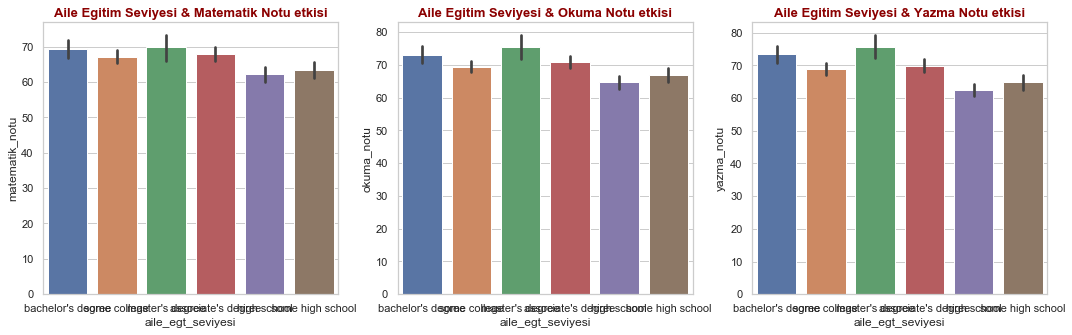

In [10]:
ogrenciler.groupby("aile_egt_seviyesi").mean()
plt.figure(figsize=(18,5))
plt.subplot(1,3,1)
sns.barplot(ogrenciler["aile_egt_seviyesi"], ogrenciler["matematik_notu"])
plt.title("Aile Egitim Seviyesi & Matematik Notu etkisi", fontdict=baslik_font)
plt.subplot(1,3,2)
sns.barplot(ogrenciler["aile_egt_seviyesi"], ogrenciler["okuma_notu"])
plt.title("Aile Egitim Seviyesi & Okuma Notu etkisi", fontdict=baslik_font)
plt.subplot(1,3,3)
sns.barplot(ogrenciler["aile_egt_seviyesi"], ogrenciler["yazma_notu"])
plt.title("Aile Egitim Seviyesi & Yazma Notu etkisi", fontdict=baslik_font)
plt.show()

In [11]:
### Soru 2 :
## Oğle yemek tipinin sınav performansları ile bir ilişkisi var mı? Varsa bunu nasıl açıklayabilirsiniz?

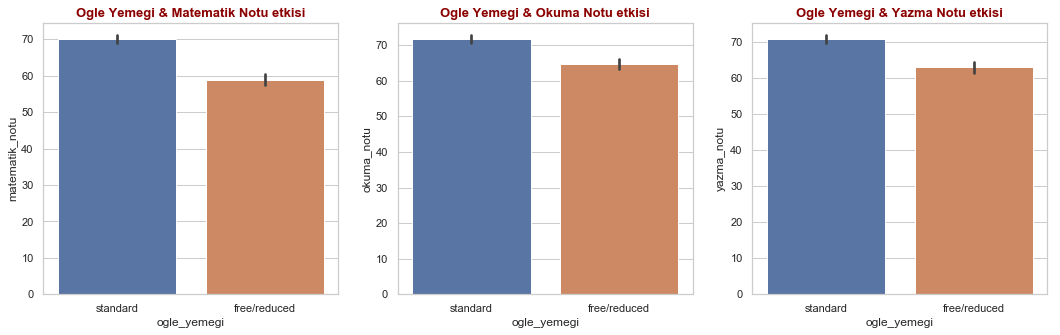

In [12]:
ogrenciler.groupby("ogle_yemegi").mean()
plt.figure(figsize=(18,5))
plt.subplot(1,3,1)
sns.barplot(ogrenciler["ogle_yemegi"], ogrenciler["matematik_notu"])
plt.title("Ogle Yemegi & Matematik Notu etkisi", fontdict=baslik_font)
plt.subplot(1,3,2)
sns.barplot(ogrenciler["ogle_yemegi"], ogrenciler["okuma_notu"])
plt.title("Ogle Yemegi & Okuma Notu etkisi", fontdict=baslik_font)
plt.subplot(1,3,3)
sns.barplot(ogrenciler["ogle_yemegi"], ogrenciler["yazma_notu"])
plt.title("Ogle Yemegi & Yazma Notu etkisi", fontdict=baslik_font)
plt.show()

## Genel olarak standart bir ogle yemeginin tum branslarin basarisinda haha olumlu etki ettigini gorebiliyoruz. 

In [13]:
### Soru 3 :
## Hazırlık kurslarının sonav performansı üzerinde bir etkisi var mı?

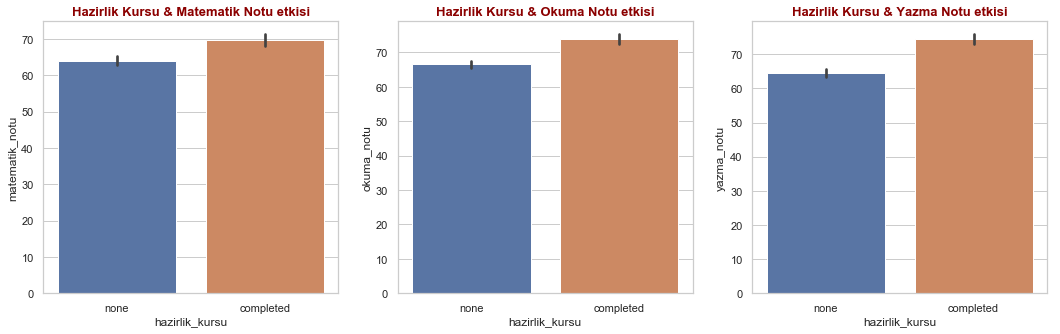

In [14]:
ogrenciler.groupby("hazirlik_kursu").mean()
plt.figure(figsize=(18,5))
plt.subplot(1,3,1)
sns.barplot(ogrenciler["hazirlik_kursu"], ogrenciler["matematik_notu"])
plt.title("Hazirlik Kursu & Matematik Notu etkisi", fontdict=baslik_font)
plt.subplot(1,3,2)
sns.barplot(ogrenciler["hazirlik_kursu"], ogrenciler["okuma_notu"])
plt.title("Hazirlik Kursu & Okuma Notu etkisi", fontdict=baslik_font)
plt.subplot(1,3,3)
sns.barplot(ogrenciler["hazirlik_kursu"], ogrenciler["yazma_notu"])
plt.title("Hazirlik Kursu & Yazma Notu etkisi", fontdict=baslik_font)
plt.show()

## Hazirlik kurslarinin tamamlanmis olmasi yine tum branslarda olumlu etki gostermistir. 

In [15]:
### Soru 4 :
## Birbiriyle korelasyonu en fazla olan dersler hangisidir?

In [16]:
korelasyon_mat_ogrenciler = ogrenciler.corr()
display(korelasyon_mat_ogrenciler)

,matematik_notu,okuma_notu,yazma_notu
matematik_notu,1.000,0.818,0.803
okuma_notu,0.818,1.000,0.955
yazma_notu,0.803,0.955,1.000


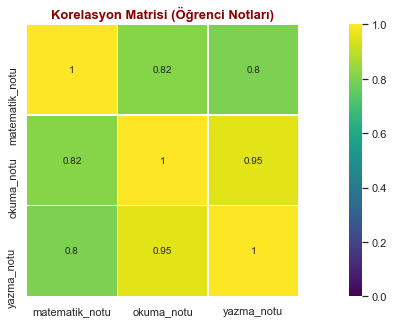

In [17]:
plt.figure(figsize=(18,5))

sns.heatmap(korelasyon_mat_ogrenciler, square=True, annot=True, linewidths=.5, vmin=0, vmax=1, cmap='viridis')
plt.title("Korelasyon Matrisi (Öğrenci Notları)", fontdict=baslik_font)

plt.show()

## Korelasyon degeri en yuksek olan dersler: Okuma Dersi - Yazma Dersi arasinda gorunuyor. (0.95)